In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bank_notes.csv',encoding='latin1')
data.head()

variance  skewness  curtosis  entropy  Target
0   3.62160    8.6661   -2.8073 -0.44699       0
1   4.54590    8.1674   -2.4586 -1.46210       0
2   3.86600   -2.6383    1.9242  0.10645       0
3   3.45660    9.5228   -4.0112 -3.59440       0
4   0.32924   -4.4552    4.5718 -0.98880       0

In [3]:
data.shape

(1372, 5)

In [4]:
data.describe()

variance     skewness     curtosis      entropy       Target
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

In [5]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
Target      0
dtype: int64

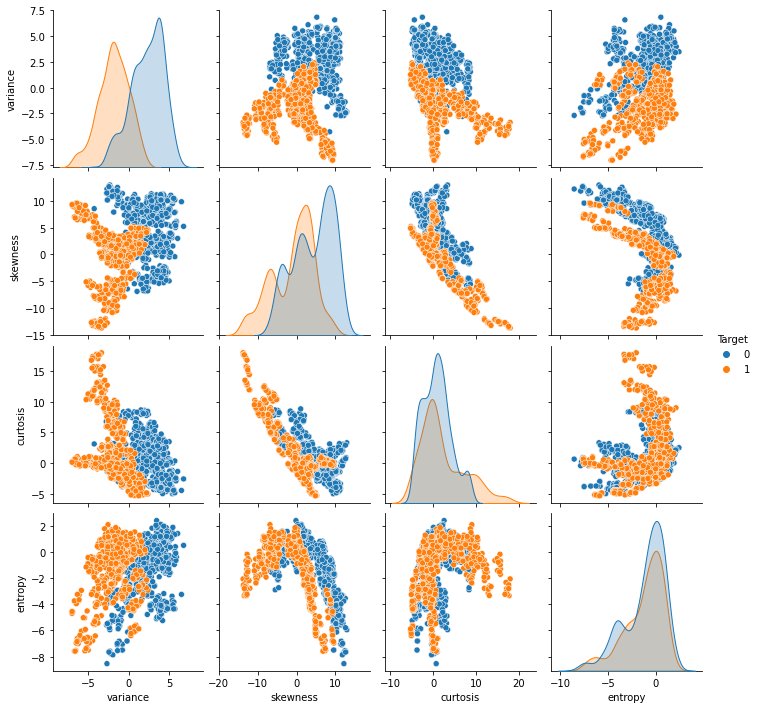

In [7]:
sns.pairplot(data,hue="Target")
plt.show()

In [8]:
data['Target'].value_counts().unique()

array([762, 610], dtype=int64)

In [9]:
sns.countplot(x=data['Target'])
plt.show()

In [10]:
sns.barplot(x="Target",y="variance",data=data,hue="Target")

<AxesSubplot:xlabel='Target', ylabel='variance'>

<AxesSubplot:xlabel='Target', ylabel='variance'>

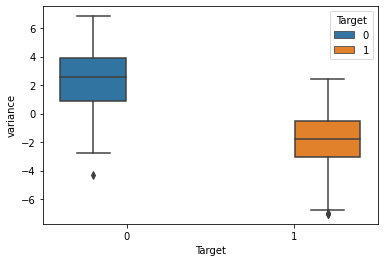

In [12]:
sns.boxplot(x="Target",y="variance",data=data,hue="Target")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


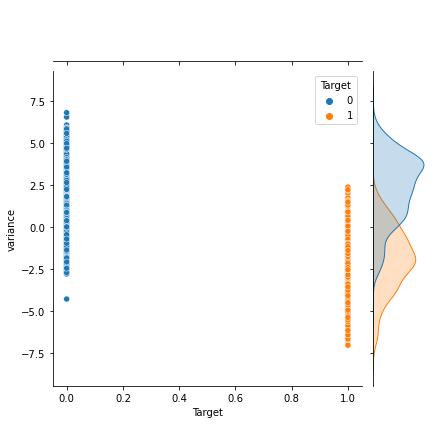

In [15]:
sns.jointplot(x="Target",y="variance",data=data,hue="Target")

<AxesSubplot:xlabel='Target', ylabel='skewness'>

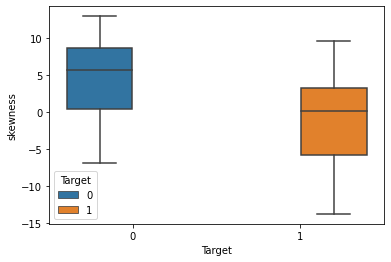

In [16]:
sns.boxplot(x="Target",y="skewness",data=data,hue="Target")

<AxesSubplot:xlabel='Target', ylabel='curtosis'>

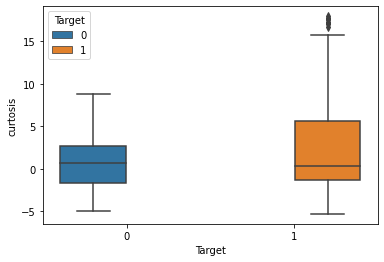

In [17]:
sns.boxplot(x="Target",y="curtosis",data=data,hue="Target")

<AxesSubplot:xlabel='Target', ylabel='entropy'>

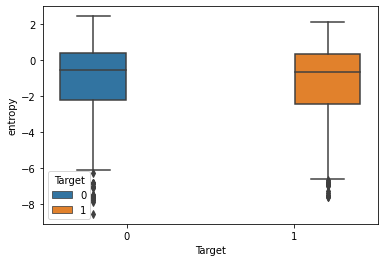

In [18]:
sns.boxplot(x="Target",y="entropy",data=data,hue="Target")

<AxesSubplot:>

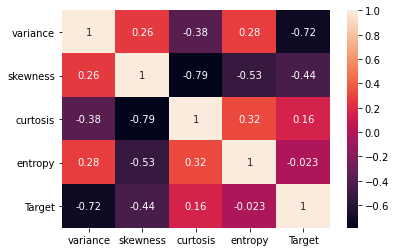

In [19]:
heatmp = data.corr()
sns.heatmap(heatmp,annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='variance', ylabel='Density'>

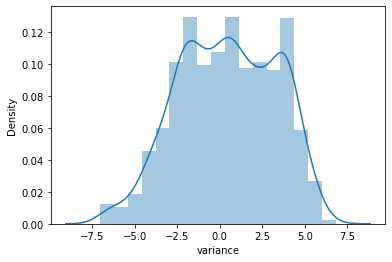

In [20]:
sns.distplot(data.variance)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='curtosis', ylabel='Density'>

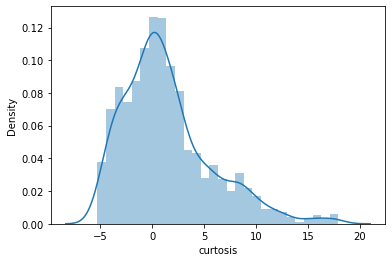

In [21]:
sns.distplot(data.curtosis)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='entropy', ylabel='Density'>

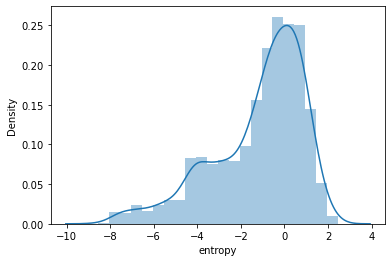

In [22]:
sns.distplot(data.entropy)

In [23]:
X = data.drop('Target',axis=1)
y = data['Target']

In [24]:
X.head(5)

variance  skewness  curtosis  entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880

In [25]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [26]:
x = pd.DataFrame(X)

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,stratify=y)

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [29]:
ypred = model.predict(xtest)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(ypred,ytest))

Accuracy Score: 0.9805825242718447


In [31]:
print("Confusion Matrix","\n",confusion_matrix(ypred,ytest))

Confusion Matrix 
 [[226   5]
 [  3 178]]


In [33]:
new_notes = np.array([4.5,-8.1,2.4,1.4],ndmin=2)
print(f'Prediction: Class{model.predict(new_notes)[0]}')
print(f'Probability [0/1]: {model.predict_proba(new_notes)[0]}')

Prediction: Class0
Probability [0/1]: [1. 0.]
